# [Challenge Data - Electricity price forecasting by Elmy](https://challengedata.ens.fr/challenges/140)

## Decision Tree Classifier

Ce notebook vise à faire l'étude (mise en place, optimisation et score) de la méthode de Decision Tree Learning sur notre problème de prédiction du paramètre _spot_id_delta_. Pour cela, nous allons regrouper les données d'entrainement en deux groupes :
* _spot_id_delta_ >= 0
* _spot_id_delta_ <= 0

In [53]:
import numpy as np
import pandas as pd
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score

X = pd.read_csv('../data/X_train.csv').set_index('DELIVERY_START').fillna(0)
y = pd.read_csv('../data/y_train.csv').set_index('DELIVERY_START').fillna(0)
X_rendu = pd.read_csv('../data/X_test.csv').set_index('DELIVERY_START')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#y_train = y_train.loc[:, ['spot_id_delta']] # permet de ne pas déclencher un SettingWithCopyWarning
#y_test = y_test.loc[:, ['spot_id_delta']]   # permet de ne pas déclencher un SettingWithCopyWarning
y_train_classified = y_train.copy()
y_train_classified['spot_id_delta'] = np.sign(y_train_classified['spot_id_delta'])
y_test_classified = y_test.copy()
y_test_classified['spot_id_delta'] = np.sign(y_test_classified['spot_id_delta'])

In [54]:
y_train.head()

,spot_id_delta
DELIVERY_START,
2022-06-02 18:00:00+02:00,14.016152
2022-07-05 22:00:00+02:00,32.604935
2022-02-06 03:00:00+01:00,-10.553339
2023-03-02 13:00:00+01:00,-5.702393
2022-08-07 14:00:00+02:00,-17.782751


Maintenant que les données sont classifiées, on peut entraîner un modèle de Decistion Tree Learning:

In [72]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import math

depths = np.arange(1, 30)
train_scores = []
test_scores = []

y_train_cassified_for_comparison = np.floor(y_train)
y_test_cassified_for_comparison = np.floor(y_test)





for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train, y_train_classified)
    train_scores.append(balanced_accuracy_score(y_train_cassified_for_comparison, clf.predict(X_train)))
    test_scores.append(balanced_accuracy_score(y_test_cassified_for_comparison, clf.predict(X_test)))

In [69]:
print(y_train_cassified_for_comparison)

                           spot_id_delta
DELIVERY_START                          
2022-06-02 18:00:00+02:00      14.016152
2022-07-05 22:00:00+02:00      32.604935
2022-02-06 03:00:00+01:00     -10.553339
2023-03-02 13:00:00+01:00      -5.702393
2022-08-07 14:00:00+02:00     -17.782751
...                                  ...
2022-01-18 05:00:00+01:00     -11.585350
2022-08-23 20:00:00+02:00      59.789947
2022-07-17 10:00:00+02:00      -7.833720
2022-03-12 05:00:00+01:00     -10.705372
2022-01-12 05:00:00+01:00       5.268016

[7423 rows x 1 columns]


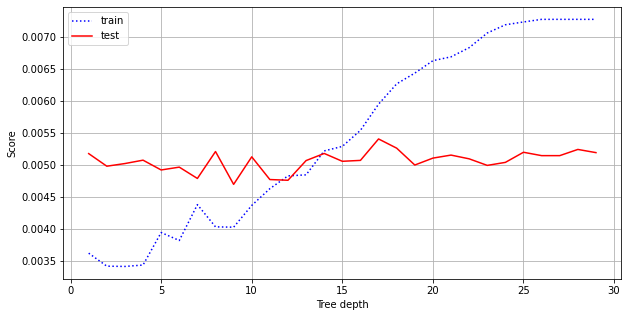

In [73]:
plt.figure(figsize=(10, 5))
plt.plot(depths, train_scores, color="b", linestyle=':', label="train")
plt.plot(depths, test_scores, color="r", linestyle='-', label="test")
plt.xlabel("Tree depth")
plt.ylabel("Score")
plt.grid()
plt.legend(loc="best")

On en déduit la profondeur optimale pour le Decision Tree Classifier :

In [11]:
best_depth = depths[np.argmax(test_scores)]
print(f"best_depth = {best_depth} for a score of {max(test_scores)}")

best_depth = 28 for a score of 0.677561282212445


Le score étant supérieur à 0.5, on peut donc prédire avec ce modèle **avec plus d'une chance sur deux** si le prix sera plus élevé sur le marché SPOT ou sur le marché Intraday.

On souhaite maintenant faire les prédictions à partir du data set X_rendu :

In [14]:
clf = DecisionTreeClassifier(max_depth=24)
clf.fit(X_train, y_train_classified)

Y_test_submission = X_rendu[['DELIVERY_START']].copy()
Y_test_submission['spot_id_delta'] = clf.predict(X_rendu.drop('DELIVERY_START', axis=1).fillna(0))


In [15]:
Y_test_submission.head()

,DELIVERY_START,spot_id_delta
0,2023-04-02 00:00:00+02:00,1.0
1,2023-04-02 01:00:00+02:00,1.0
2,2023-04-02 02:00:00+02:00,1.0
3,2023-04-02 03:00:00+02:00,-1.0
4,2023-04-02 04:00:00+02:00,-1.0


In [16]:
Y_test_submission.to_csv('../data/y_submission.csv', index=False)

2141    2022-04-04 07:00:00+02:00
2142    2022-04-04 08:00:00+02:00
4796    2022-07-26 22:00:00+02:00
Name: DELIVERY_START, dtype: object


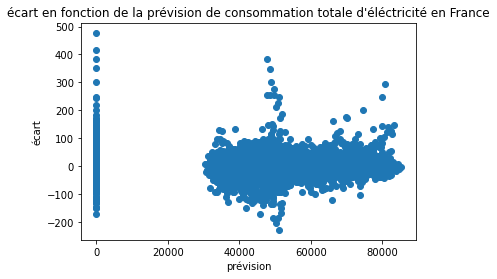

In [34]:
y_train = pd.read_csv('../data/y_train.csv').fillna(0)
X_train = pd.read_csv('../data/X_train.csv').fillna(0)

threshold = 600

eliminated = y_train[abs(y_train['spot_id_delta']) - threshold >= 0].DELIVERY_START
print(eliminated)
y_train = y_train[~y_train['DELIVERY_START'].isin(eliminated)]
X_train = X_train[~X_train['DELIVERY_START'].isin(eliminated)]


y=y_train['spot_id_delta']
x=X_train["load_forecast"]
plt.title("écart en fonction de la prévision de consommation totale d'éléctricité en France")
plt.xlabel("prévision")
plt.ylabel("écart")
plt.scatter(x,y)

In [25]:
x.size

7423

In [26]:
y.size

10605